In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

employee_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
#pd.read_csv(r'C:\Users\aiLab\Desktop\example.csv')
employee_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

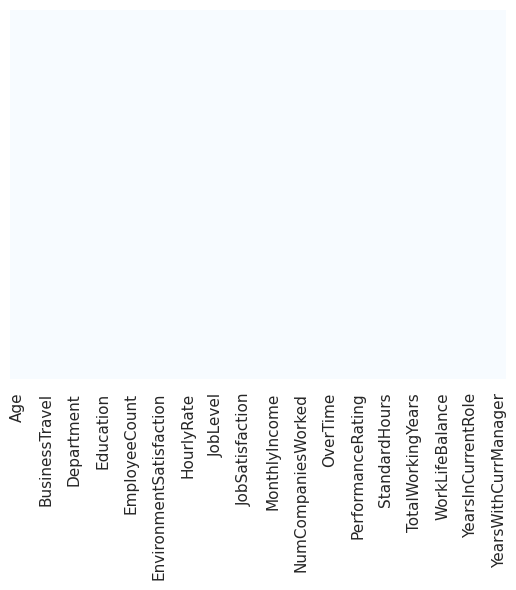

In [ ]:
sns.set()
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
for column in employee_df.select_dtypes(include=['object']):
    print(column)
    print(employee_df[column].unique())
    print('-----------------------------------')

Attrition
['Yes' 'No']
-----------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-----------------------------------
Department
['Sales' 'Research & Development' 'Human Resources']
-----------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-----------------------------------
Gender
['Female' 'Male']
-----------------------------------
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-----------------------------------
MaritalStatus
['Single' 'Married' 'Divorced']
-----------------------------------
Over18
['Y']
-----------------------------------
OverTime
['Yes' 'No']
-----------------------------------


In [ ]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [ ]:
#drop the column, use inplce True for delete the information from the memeory
employee_df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
attrition = employee_df[employee_df['Attrition'] == 1]
no_attrition = employee_df[employee_df['Attrition']==0]

In [ ]:

fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type":"xy"},{"type":"domain"}]],
                    subplot_titles= ("Count of Attrition", "Distribution of Attrition"))

fig.add_trace(go.Bar(x = employee_df['Attrition'].value_counts(),
                     y = ['Employee who stayed', 'Employee who left'],
                     orientation = 'h',
                     opacity=0.8),
                     row=1,col=1)

fig.add_trace(go.Pie(values=employee_df['Attrition'].value_counts(),
                    opacity=0.8),
                    row=1, col=2)
fig.update_layout(height=400, showlegend=False)

fig.show()

In [ ]:

def categorical_colum_investigaton(col_name):
    """First Plot: Pie chart for categorical column to see percentage of each value
       Secons Plot: Count plot for categorical column to see the number of count for each of the type
       Third Plot is Number of Count for separeted for Attribition"""

    f,ax = plt.subplots(1,3, figsize=(18,6))
    employee_df[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
    employee_df[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[1])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    sns.countplot(col_name, hue='Attrition',data=employee_df, ax=ax[2], palette='Set3')
    ax[2].set_title(f'Attrition by {col_name}')
    ax[2].set_xlabel(f'{col_name}')
    ax[2].set_ylabel('Count')

<ipython-input-13-d0cfdf841ccd>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

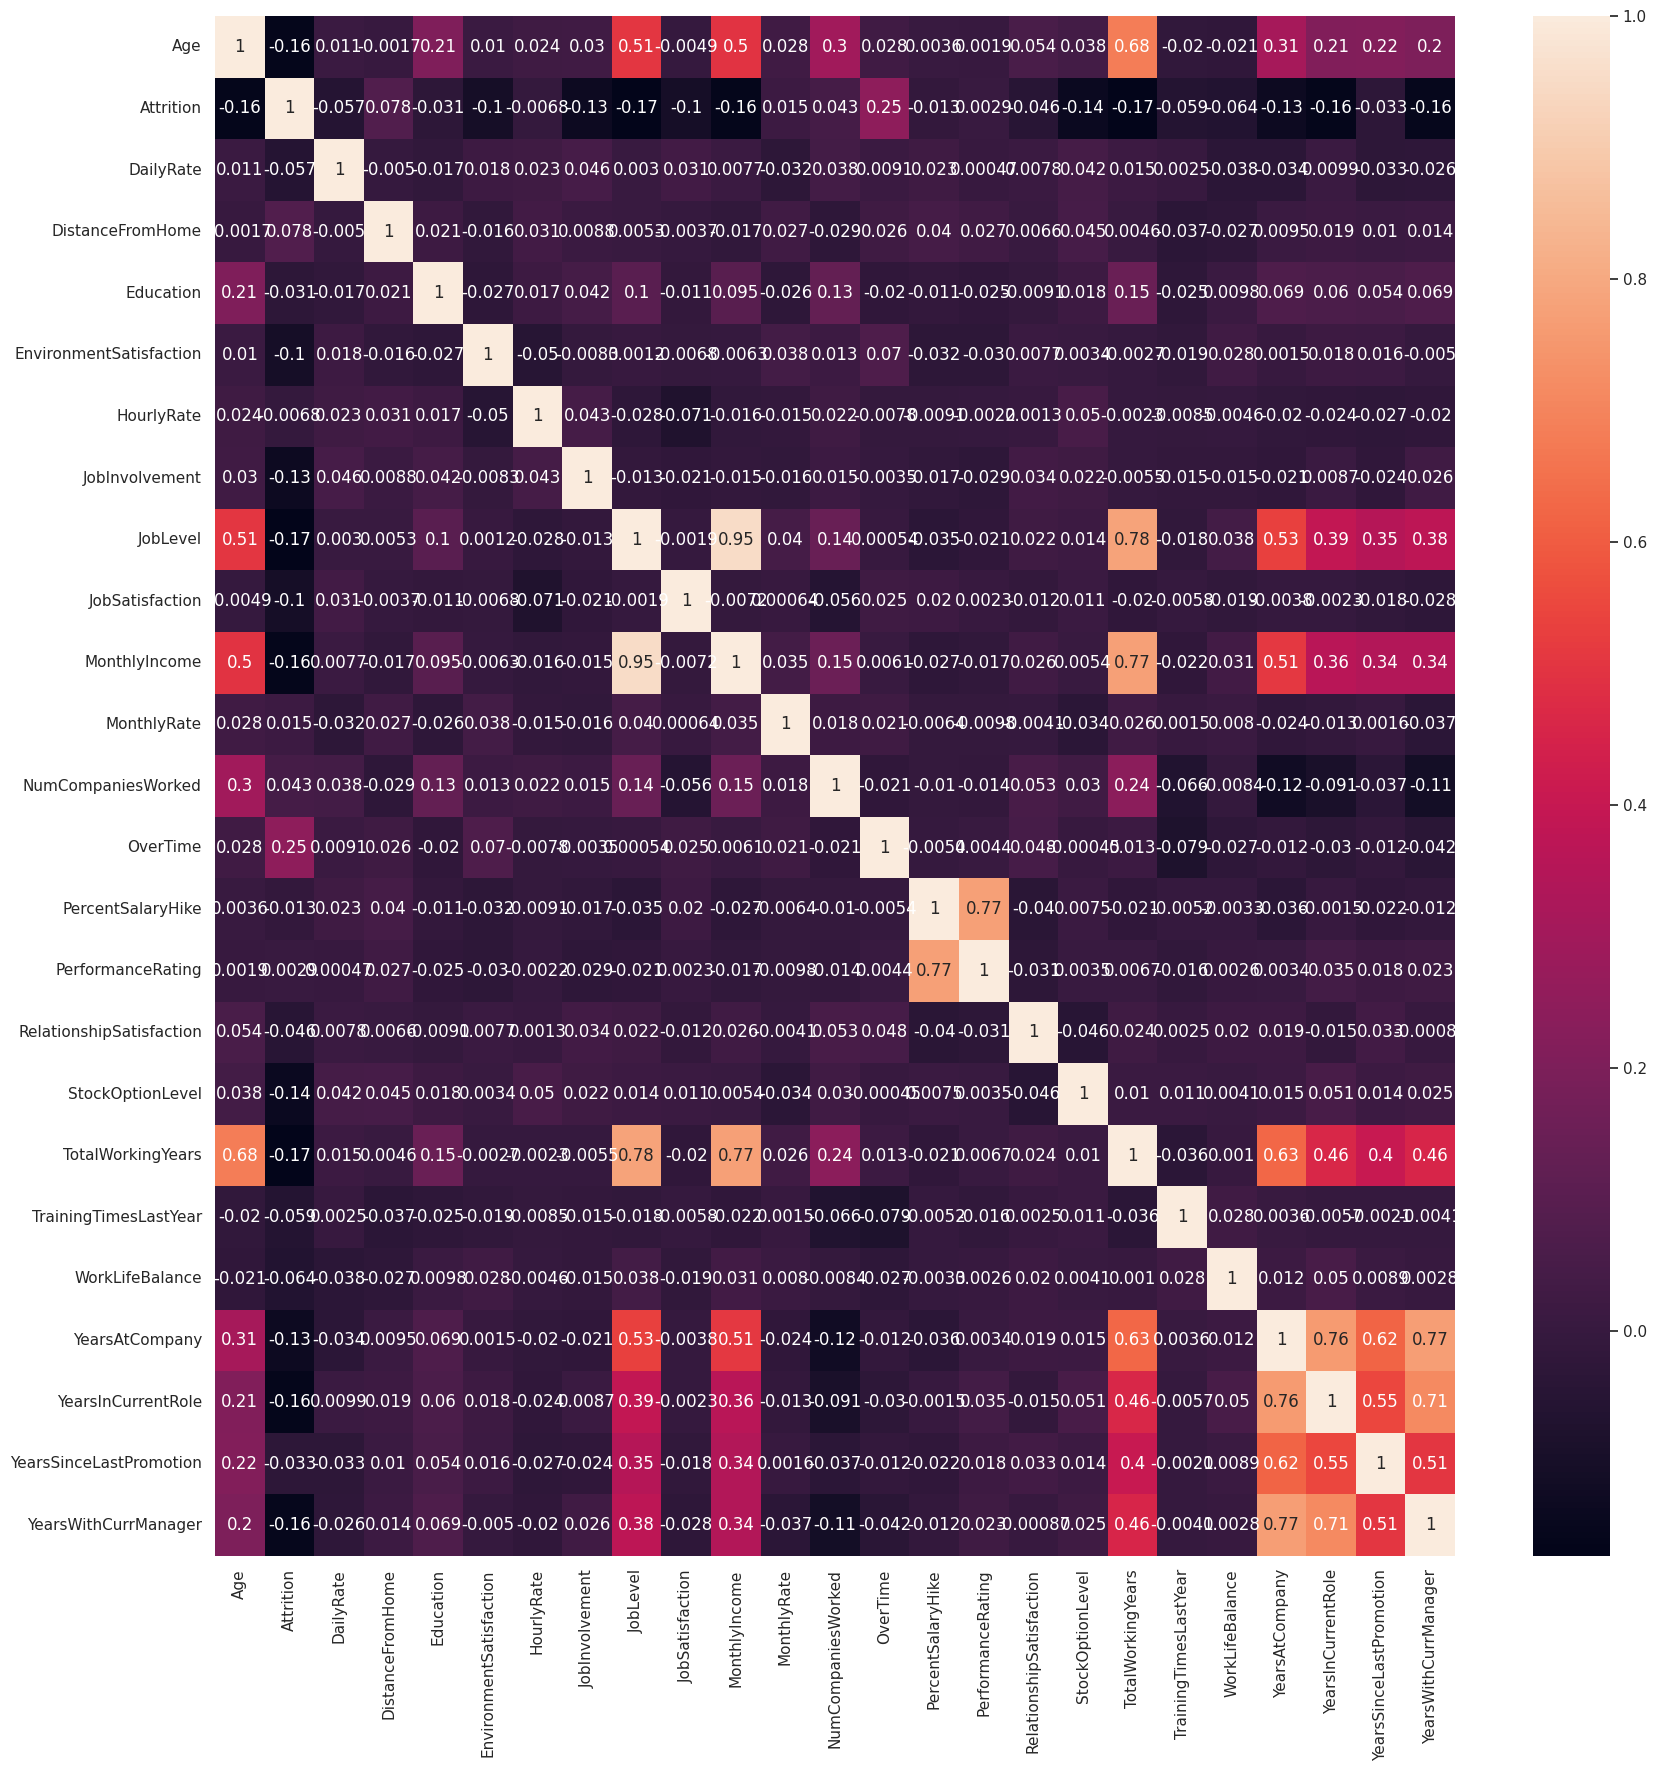

In [ ]:

correlations = employee_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

In [ ]:
# drop used column
employee_df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)



In [ ]:
#Age Column more likey the drop the job younger than 35
employee_df['Age_bool'] = employee_df['Age'].apply(lambda x:1 if x<35 else 0)
employee_df.drop('Age', axis=1, inplace=True)

In [ ]:
#Daily Rate Column more likey the drop the job if dailtRate less than 750
employee_df['DailyRate_bool'] = employee_df['DailyRate'].apply(lambda x:1 if x<750 else 0)
employee_df.drop('DailyRate', axis=1, inplace=True)

In [ ]:
#Departman Column  more likey the drop the job if the employee working at Sales Departmaen
employee_df['Department_bool'] = employee_df['Department'].apply(lambda x:1 if x=='Sales' else 0)
employee_df.drop('Department', axis=1, inplace=True)

In [ ]:
# DistanceFromHome Column  more likey the drop the job if the employeeworking far more than 10
employee_df['DistanceFromHome_bool'] = employee_df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
employee_df.drop('DistanceFromHome', axis=1, inplace=True)

In [ ]:
# DistanceFromHome Column  more likey the drop the job if the employeeworking hourly rate less than 65
employee_df['HourlyRate_bool'] = employee_df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
employee_df.drop('HourlyRate', axis=1, inplace=True)

In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['JobRole_bool'] = employee_df['JobRole'].apply(lambda x:1 if x=='Sales Executive' else 0)
employee_df.drop('JobRole', axis=1, inplace=True)

In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['MonthlyIncome_bool'] = employee_df['MonthlyIncome'].apply(lambda x:1 if x<3500 else 0)
employee_df.drop('MonthlyIncome', axis=1, inplace=True)


In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['NumCompaniesWorked_bool'] = employee_df['NumCompaniesWorked'].apply(lambda x:1 if x>4 else 0)
employee_df.drop('NumCompaniesWorked', axis=1, inplace=True)

In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['TotalWorkingYears_bool'] = employee_df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
employee_df.drop('TotalWorkingYears', axis=1, inplace=True)

In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['YearsAtCompany_bool'] = employee_df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
employee_df.drop('YearsAtCompany', axis=1, inplace=True)


In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['YearsInCurrentRole_bool'] = employee_df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
employee_df.drop('YearsInCurrentRole', axis=1, inplace=True)


In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['YearsSinceLastPromotion_bool'] = employee_df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
employee_df.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['YearsWithCurrManager_bool'] = employee_df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
employee_df.drop('YearsWithCurrManager', axis=1, inplace=True)


In [ ]:
employee_df.drop('MonthlyRate', axis=1, inplace=True)

In [ ]:
employee_df.drop('PercentSalaryHike', axis=1, inplace=True)

In [ ]:
#JobRole Column  more likey the drop the job if the employee working as Sales Executive
employee_df['Gender'] = employee_df['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [ ]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        employee_df[col] = employee_df[col].astype('category')

In [ ]:
employee_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Attrition                     1470 non-null   int64   
 1   BusinessTravel                1470 non-null   category
 2   Education                     1470 non-null   category
 3   EducationField                1470 non-null   category
 4   Gender                        1470 non-null   category
 5   JobLevel                      1470 non-null   int64   
 6   MaritalStatus                 1470 non-null   category
 7   OverTime                      1470 non-null   category
 8   PerformanceRating             1470 non-null   int64   
 9   StockOptionLevel              1470 non-null   category
 10  TrainingTimesLastYear         1470 non-null   category
 11  Age_bool                      1470 non-null   int64   
 12  DailyRate_bool                1470 non-null   in

In [ ]:
#separate the categorical and numerical column
X_categorical = employee_df.select_dtypes(include=['category'])
X_numerical = employee_df.select_dtypes(include=['int64'])


In [ ]:
#create teh target column
y = employee_df['Attrition']

In [ ]:
X_numerical.drop('Attrition', axis=1, inplace=True)

In [ ]:
#handle the categorical variable
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()



,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,HourlyRate_bool,JobRole_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,1,0,0,0,1,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1,1,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,1,1,1,0,0


In [ ]:

#Scaler the data
X_all.columns = X_all.columns.astype(str)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 47), Test Data Shape (441, 47)


In [ ]:
#import libraires
import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_pred = logistic_model.predict(X_test)

In [ ]:
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)

In [ ]:
print("Logistic Regression Metrics: ")
print("Accuracy:",100*logistic_accuracy)
print("Precision:",100*logistic_precision)
print("Recall:",100*logistic_recall)
print("F1-Score:",100*logistic_f1)

Logistic Regression Metrics: 
Accuracy: 85.03401360544217
Precision: 56.25
Recall: 25.71428571428571
F1-Score: 35.29411764705882


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

In [ ]:
print("Random Forest Metrics: ")
print("Accuracy:",100*rf_accuracy)
print("Precision:",100*rf_precision)
print("Recall:",100*rf_recall)
print("F1-Score:",100*rf_f1)

Random Forest Metrics: 
Accuracy: 84.12698412698413
Precision: 50.0
Recall: 17.142857142857142
F1-Score: 25.53191489361702


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_pred = knn_model.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

In [ ]:
print("k-NN Metrics:")
print("Accuracy:", 100*knn_accuracy)
print("Precision:", 100*knn_precision)
print("Recall:", 100*knn_recall)
print("F1-Score:", 100*knn_f1)

k-NN Metrics:
Accuracy: 84.12698412698413
Precision: 50.0
Recall: 14.285714285714285
F1-Score: 22.222222222222225


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_pred = nb_model.predict(X_test)

In [ ]:
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

In [ ]:
print("Naive Bayes Metrics:")
print("Accuracy:", 100*nb_accuracy)
print("Precision:", 100*nb_precision)
print("Recall:", 100*nb_recall)
print("F1-Score:", 100*nb_f1)

Naive Bayes Metrics:
Accuracy: 72.56235827664399
Precision: 28.92561983471074
Recall: 50.0
F1-Score: 36.64921465968586


In [ ]:
svm_model = SVC(probability=True)  #probability=True for ROC curve later
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [ ]:
print("SVM Metrics:")
print("Accuracy:", 100*svm_accuracy)
print("Precision:", 100*svm_precision)
print("Recall:", 100*svm_recall)
print("F1-Score:", 100*svm_f1)

SVM Metrics:
Accuracy: 86.16780045351474
Precision: 84.61538461538461
Recall: 15.714285714285714
F1-Score: 26.506024096385545


In [ ]:
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
nb_probs = nb_model.predict_proba(X_test)[:, 1]

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_nb = auc(fpr_nb, tpr_nb)

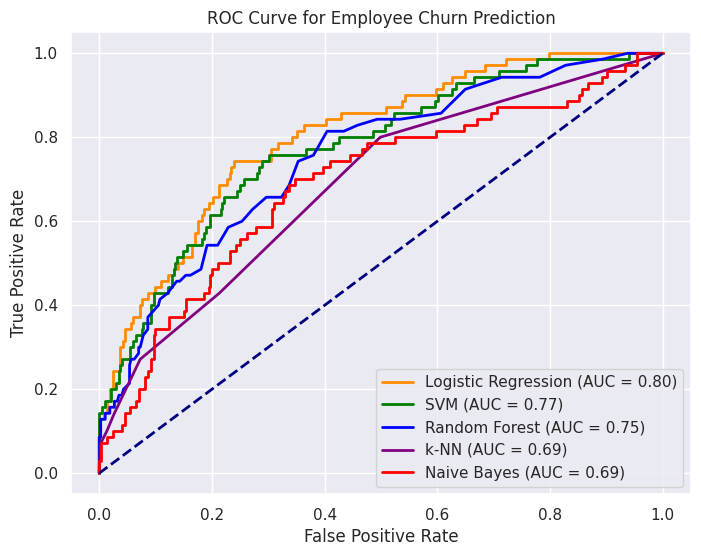

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logistic))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='k-NN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Employee Churn Prediction')
plt.legend(loc='lower right')
plt.show()